Index(['timestamp', 'speed_kmh', 'acceleration_mps2', 'brake_intensity',
       'battery_level', 'energy_consumption', 'regen_braking_usage',
       'lane_deviation', 'obstacle_distance', 'traffic_density',
       'weather_condition', 'road_type', 'steering_angle', 'reaction_time',
       'ADAS_output'],
      dtype='object')

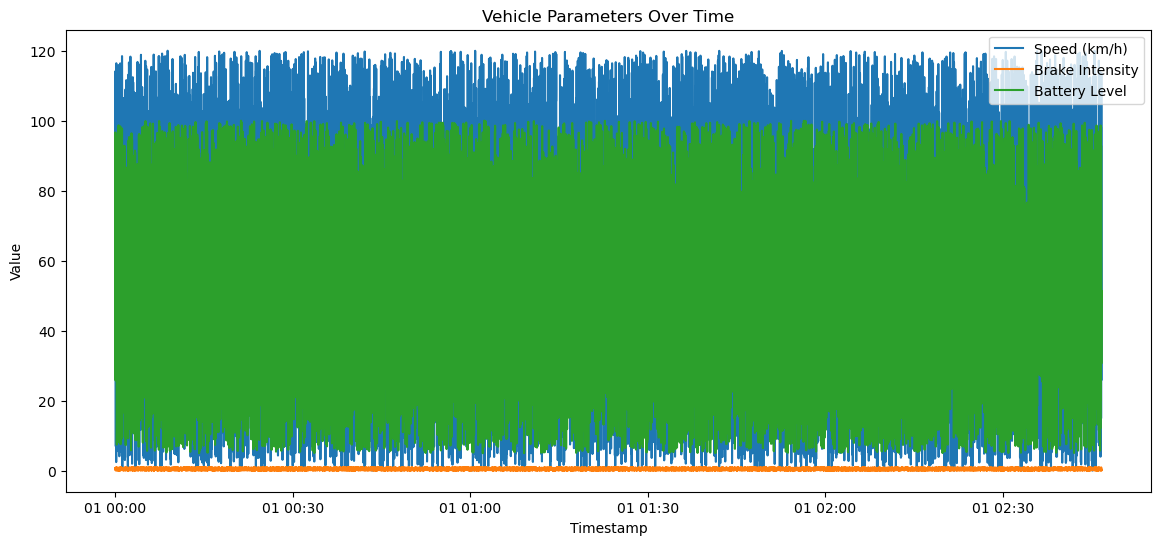

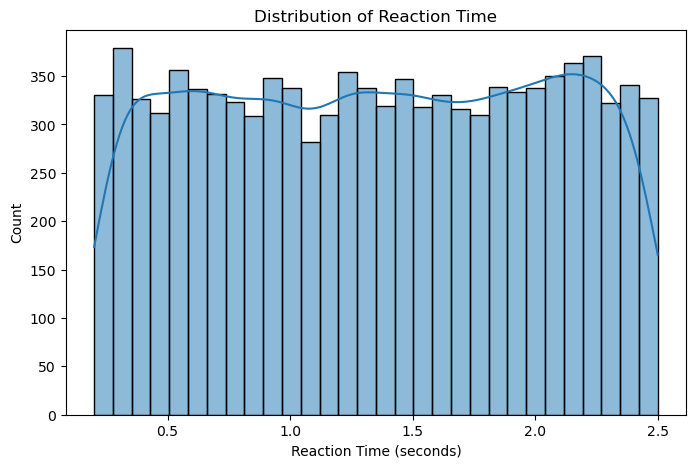

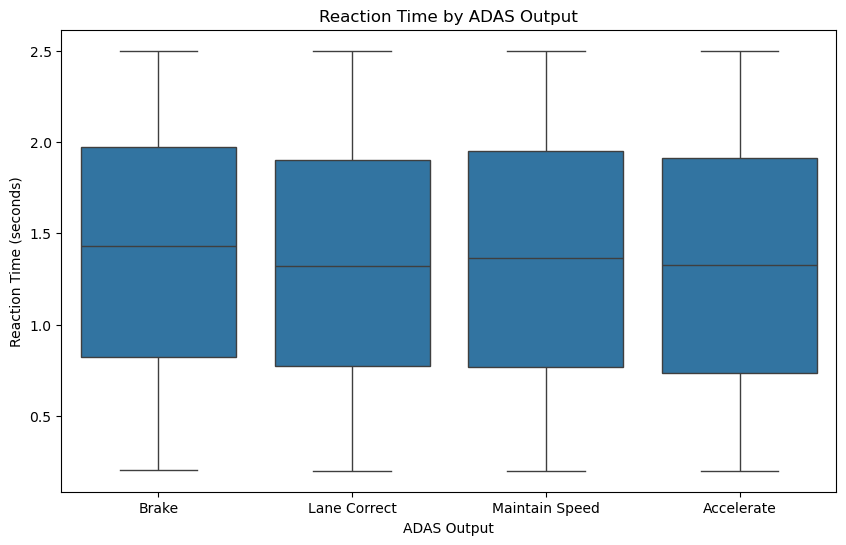

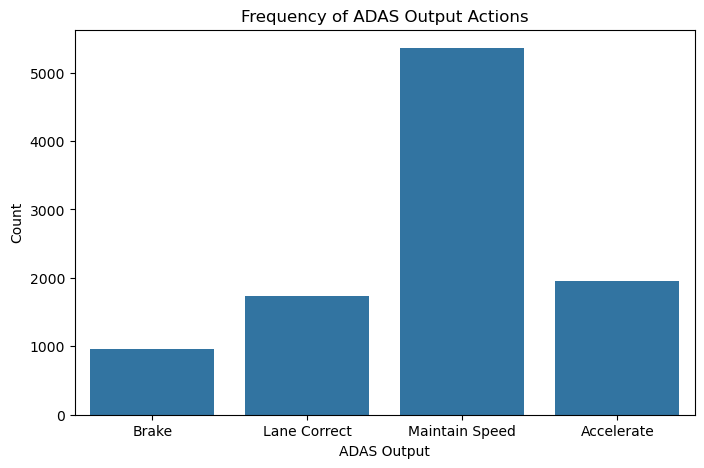

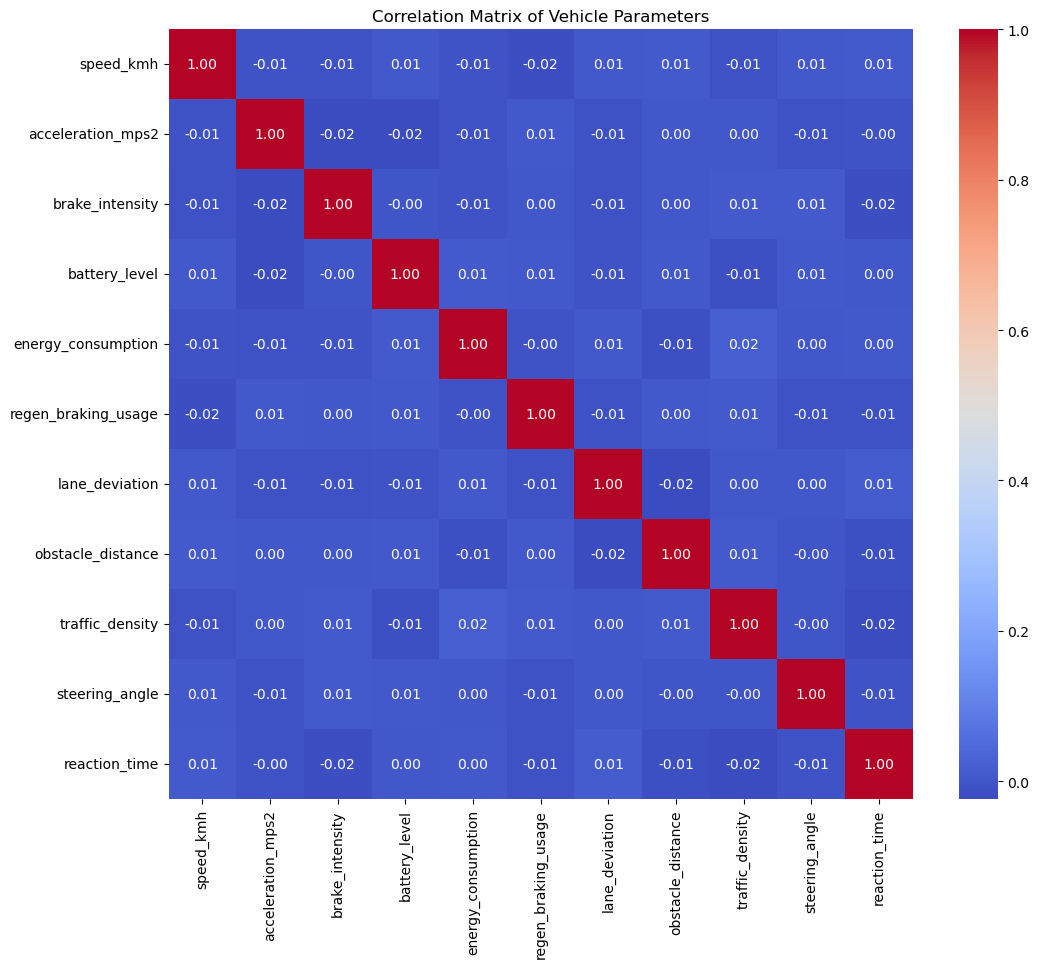

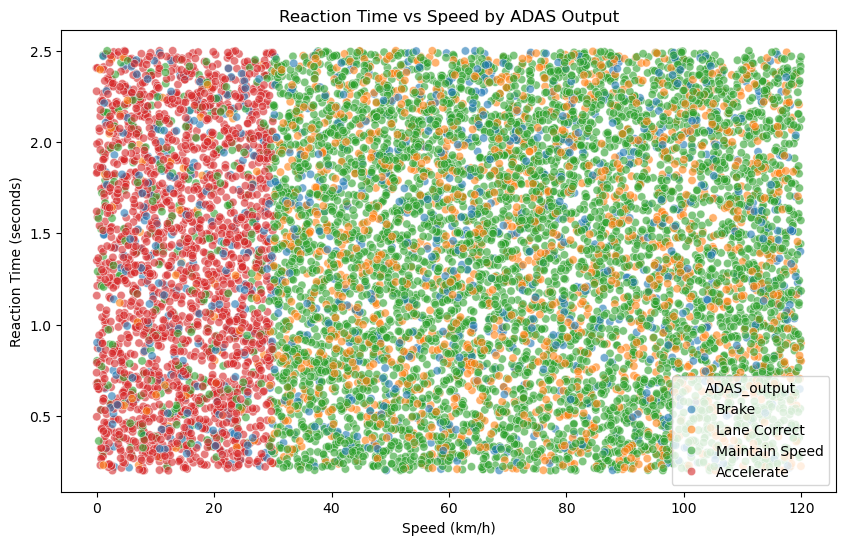

In [24]:
# 1. Time Series Plot: speed_kmh, brake_intensity, battery_level over time
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['speed_kmh'], label='Speed (km/h)')
plt.plot(df['timestamp'], df['brake_intensity'], label='Brake Intensity')
plt.plot(df['timestamp'], df['battery_level'], label='Battery Level')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Vehicle Parameters Over Time')
plt.legend()
plt.show()

# 2. Distribution of Reaction Time
plt.figure(figsize=(8, 5))
sns.histplot(df['reaction_time'], bins=30, kde=True)
plt.title('Distribution of Reaction Time')
plt.xlabel('Reaction Time (seconds)')
plt.show()

# 3. Box Plot: Reaction Time by ADAS_output
plt.figure(figsize=(10, 6))
sns.boxplot(x='ADAS_output', y='reaction_time', data=df)
plt.title('Reaction Time by ADAS Output')
plt.xlabel('ADAS Output')
plt.ylabel('Reaction Time (seconds)')
plt.show()

# 4. Count Plot: Frequency of ADAS_output classes
plt.figure(figsize=(8, 5))
sns.countplot(x='ADAS_output', data=df)
plt.title('Frequency of ADAS Output Actions')
plt.xlabel('ADAS Output')
plt.ylabel('Count')
plt.show()

# 5. Correlation Heatmap of numeric columns
numeric_cols = ['speed_kmh', 'acceleration_mps2', 'brake_intensity', 'battery_level',
                'energy_consumption', 'regen_braking_usage', 'lane_deviation',
                'obstacle_distance', 'traffic_density', 'steering_angle', 'reaction_time']
plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Vehicle Parameters')
plt.show()

# 6. Scatter plot: Reaction Time vs Speed colored by ADAS_output
plt.figure(figsize=(10, 6))
sns.scatterplot(x='speed_kmh', y='reaction_time', hue='ADAS_output', data=df, alpha=0.6)
plt.title('Reaction Time vs Speed by ADAS Output')
plt.xlabel('Speed (km/h)')
plt.ylabel('Reaction Time (seconds)')
plt.show()

--- Random Forest Regressor ---
Mean Squared Error (MSE): 0.47800938571824975
Mean Absolute Error (MAE): 0.5960894567272722



/tmp/ipykernel_412/19475786.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['MAE', 'MSE'], y=[mae, mse], palette='pastel')


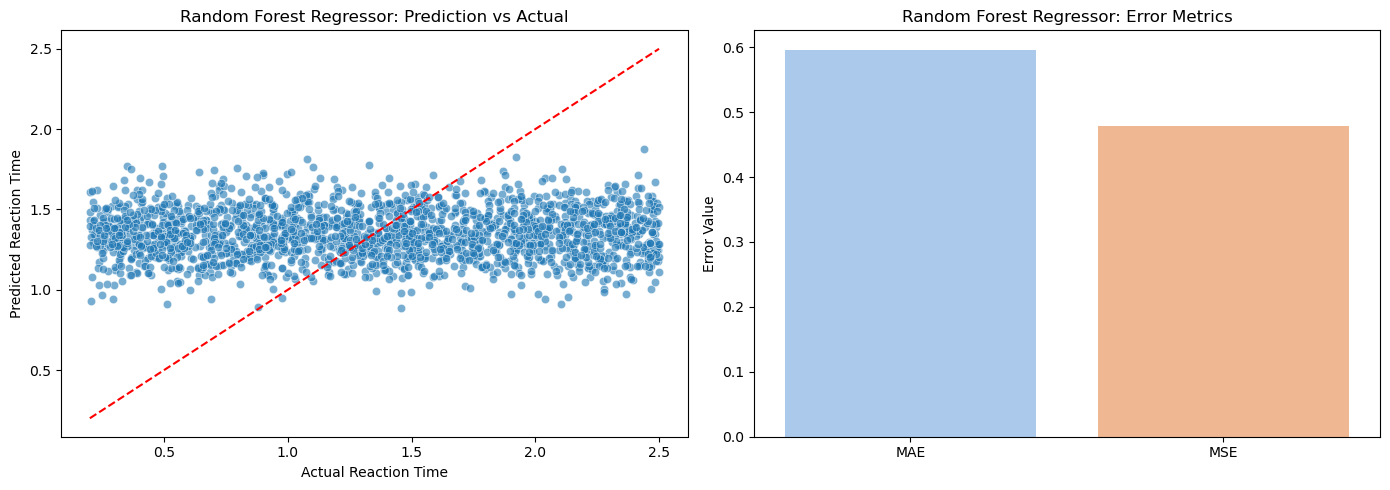

--- Decision Tree Regressor ---
Mean Squared Error (MSE): 0.8889900502697503
Mean Absolute Error (MAE): 0.7694949854369083



/tmp/ipykernel_412/19475786.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['MAE', 'MSE'], y=[mae, mse], palette='pastel')


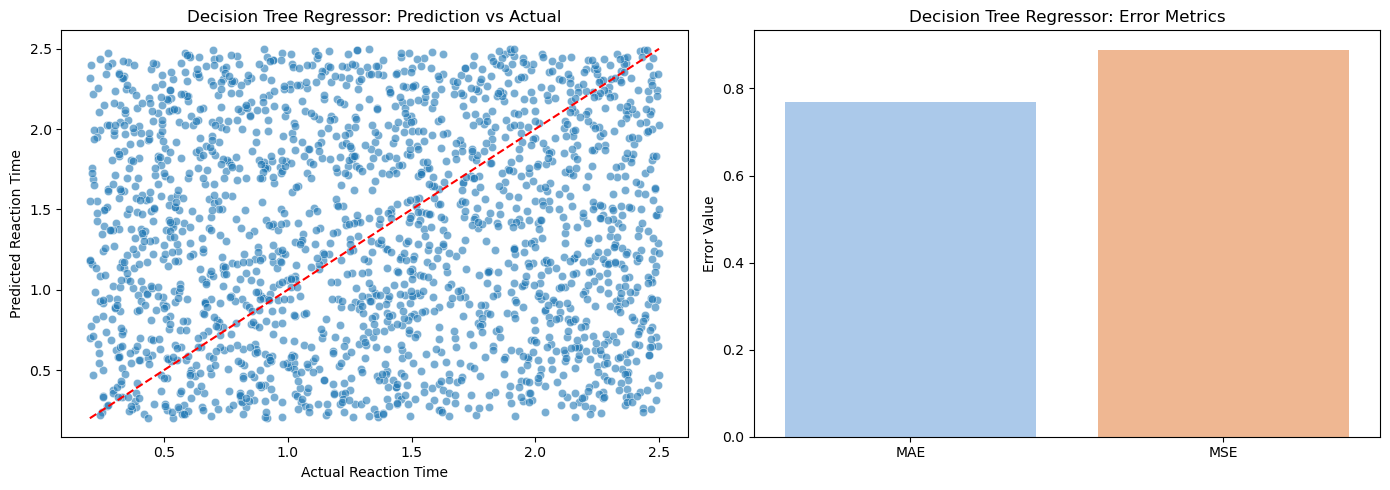

--- Linear Regressor ---
Mean Squared Error (MSE): 0.4575066752633439
Mean Absolute Error (MAE): 0.5871047758080784



/tmp/ipykernel_412/19475786.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['MAE', 'MSE'], y=[mae, mse], palette='pastel')


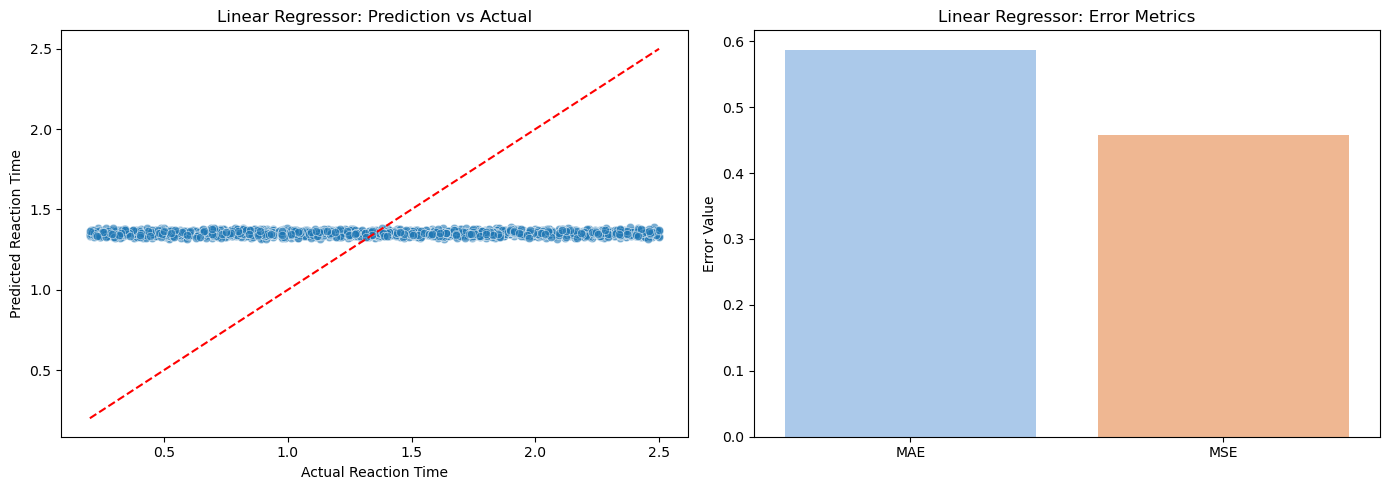

In [25]:
X = df[['speed_kmh', 'acceleration_mps2', 'brake_intensity', 'battery_level', 'obstacle_distance']]
y = df['reaction_time']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_LinearRegression = model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"--- {name} ---")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print()
    return mae, mse

def plot_results(y_test, y_pred, mae, mse, model_name):
    plt.figure(figsize=(14, 5))

    # Prediction vs Actual scatter plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Reaction Time")
    plt.ylabel("Predicted Reaction Time")
    plt.title(f"{model_name}: Prediction vs Actual")

    # Bar plot for MAE and MSE
    plt.subplot(1, 2, 2)
    sns.barplot(x=['MAE', 'MSE'], y=[mae, mse], palette='pastel')
    plt.title(f"{model_name}: Error Metrics")
    plt.ylabel("Error Value")

    plt.tight_layout()
    plt.show()

mae_rf, mse_rf = evaluate_model("Random Forest Regressor", y_test, y_pred_rf)
plot_results(y_test, y_pred_rf, mae_rf, mse_rf, "Random Forest Regressor")
mae_dt, mse_dt = evaluate_model("Decision Tree Regressor", y_test, y_pred_tree)
plot_results(y_test, y_pred_tree, mae_dt, mse_dt, "Decision Tree Regressor")
mae_lr, mse_lr = evaluate_model("Linear Regressor", y_test, y_pred_LinearRegression)
plot_results(y_test, y_pred_LinearRegression, mae_lr, mse_lr, "Linear Regressor")
